## Predicting Car Price

This data is a **regression problem**, trying to predict selling price of car.

The followings describe the features.

- **name**: name and brand of car
- **Year**: 
- **selling_price**: price of selling car
- **km_driven**: how many kilometer car is driven
- **fuel**: Type of fuel that car consume (Diesel, Petrol, LPG, CNG)
- **seller_type**: who is seller (Individual, Dealer, Trustmark Dealer)
- **transmission**: Type of gear (Manual, Automatic)
- **owner**: First Owner, Second Owner, Third Owner, Fourth & Above Owner
- **mileage**: how many kilometer per 1 liter of fuel that car can drive
- **engine**: 
- **max_power**: the maximum power of the cars
- **seats**: 

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore')

## 1. Load data

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
# Print the first five rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of your data
df.shape

(8128, 13)

In [5]:
# Show Statistical information of data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Some data preparation

In [7]:
# Replace First Owner to 1, Second Owner to 2, Third Owner to 3, Fourth & Above Owner to 4, Test Drive Car to 5
df["owner"] = df["owner"].replace(["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"], [1, 2, 3, 4, 5])

In [8]:
# Remove all rows with CNG and LPG
df.drop(df[(df['fuel']=='LPG') | (df['fuel']=='CNG')].index, inplace = True)

In [9]:
# Remove 'kmpl' and convert the column to float
df['mileage'] = df['mileage'].str.replace('kmpl', '').astype('float64')

In [10]:
# Remove 'CC' and convert the column to float
df['engine'] = df['engine'].str.replace('CC', '').astype('float64')

In [11]:
# Remove 'bhp' and convert the column to float
df['max_power'] = df['max_power'].str.replace('bhp', '').astype('float64')

In [12]:
# Rename the name column and assign only the first word of car's name
df['name'] = df['name'].str.split().str[0]
df = df.rename(columns={'name': 'brand'}) 

In [13]:
# Drop the feature torque
df.drop('torque', axis='columns', inplace=True)

In [14]:
# Remove all car that is test drive car
df.drop(df[df['owner']==5].index, inplace = True)

In [15]:
# Take log transform to selling_price column
df['selling_price'] = np.log(df['selling_price'])

In [16]:
# Print the first five rows of data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [17]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


### Convert every column to numeric

In [18]:
# label encoding in brand column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])
le.classes_


array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [19]:
# label encoding in fuel column
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

In [20]:
# label encoding in seller type column
le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

In [21]:
# label encoding in transmission column
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

In [22]:
# Print the first five rows of data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [23]:
# Check the data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 815.3 KB


Now, all of column are numeric 

## 2. Exploratory Data Analysis

EDA is the step to see the data distribution and let us better understand the data.

### Multivariate analysis

#### Boxplot

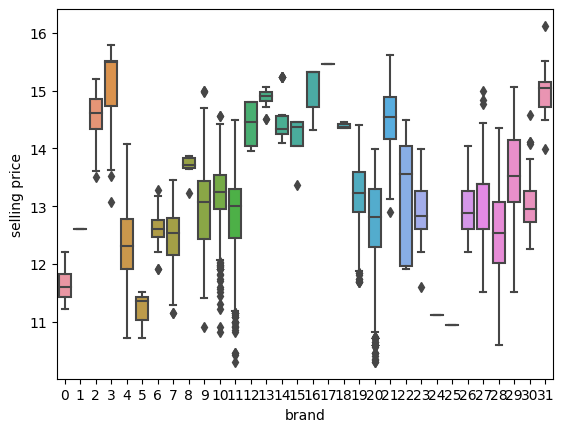

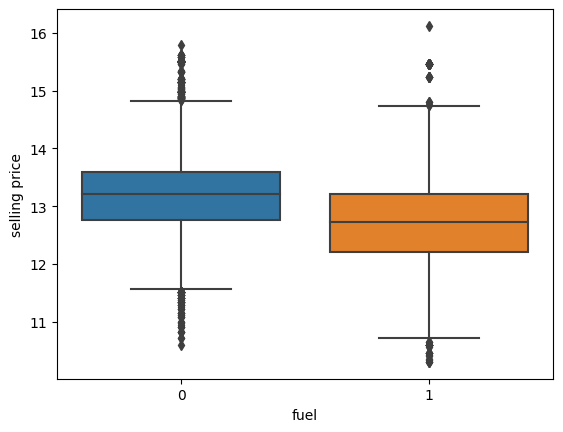

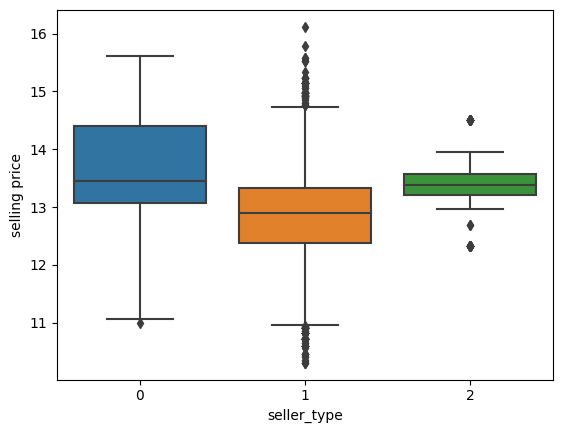

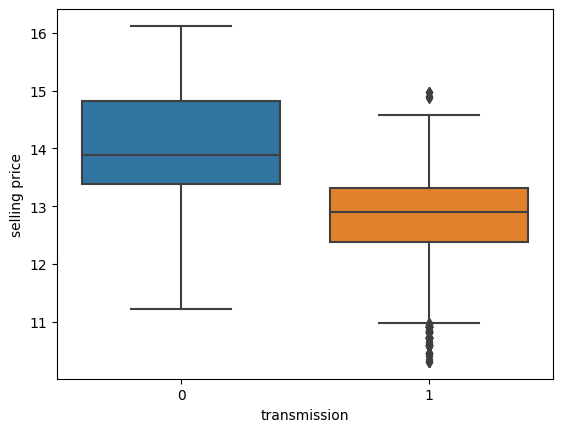

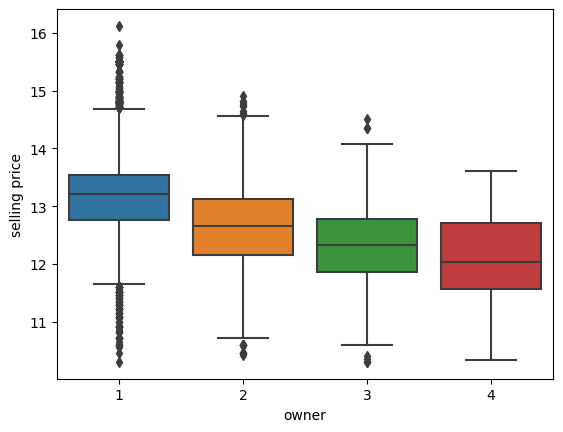

In [24]:
# Create bar plot for category columns with selling price
for col in df[['brand', 'fuel', 'seller_type', 'transmission', 'owner']].columns:
    sns.boxplot(x = df[col], y = df["selling_price"])
    plt.ylabel("selling price")
    plt.xlabel(col)
    plt.show()

From the box plot, I can analyze 2 things:
1. The fuel type does not effect to selling price (fuel and selling price box plot)
2. The car with auto automatic transmission has higher selling price than the car with manual transmission (transmission and selling price box plot)
2. The more owner, The lower the selling price (owner and selling price box plot)

#### Scatterplot plot

<Axes: xlabel='max_power', ylabel='engine'>

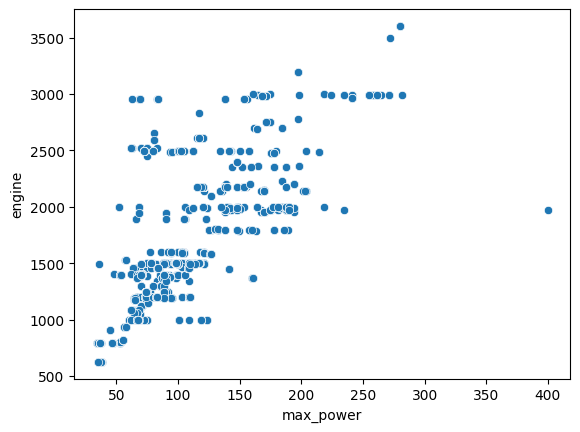

In [25]:
# To see the relation between max power and engine
sns.scatterplot(x = df['max_power'], y = df['engine'])

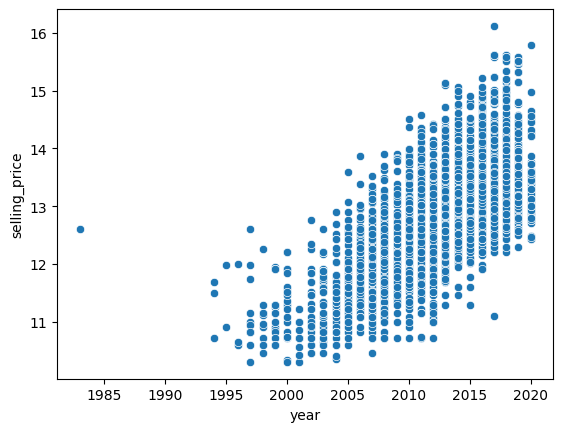

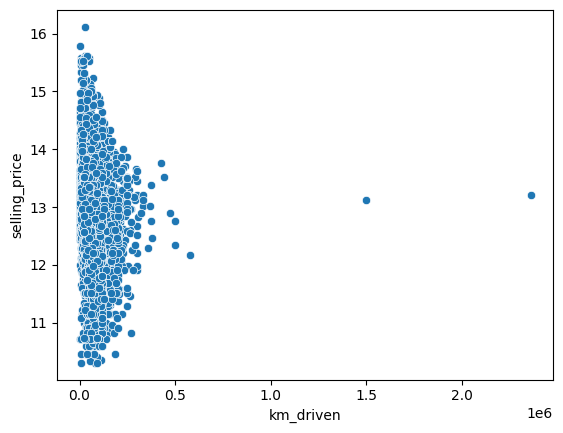

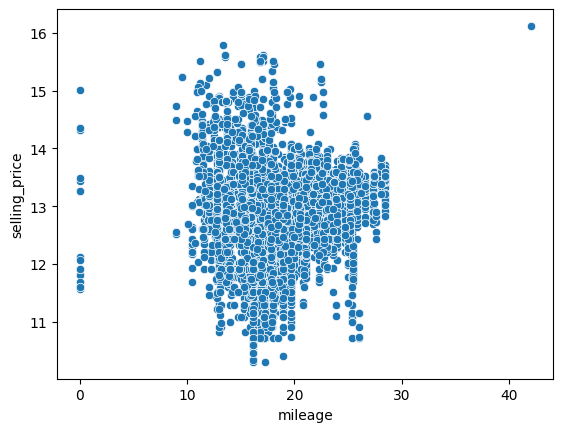

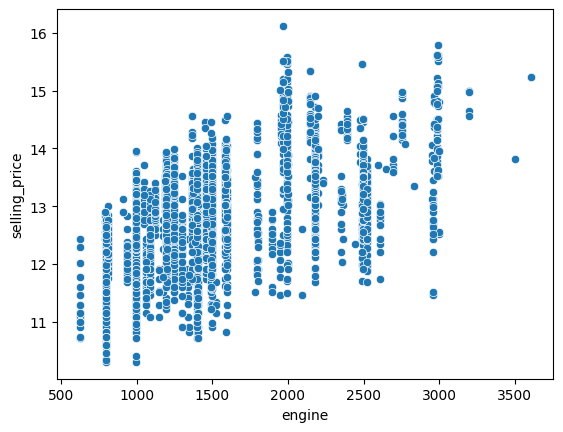

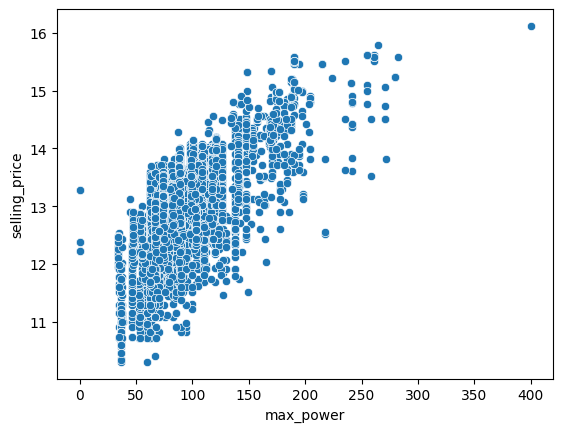

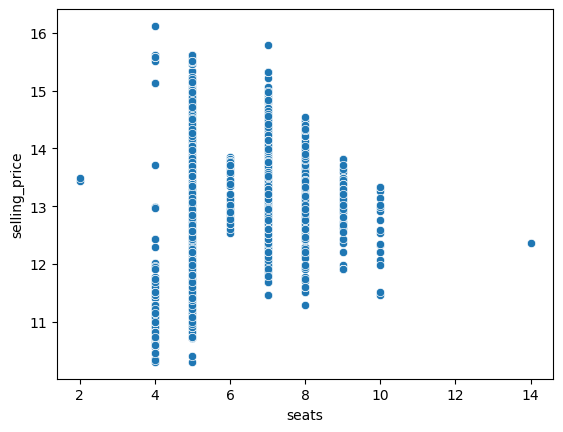

In [26]:
# Create scatter plot for numeric columns with selling price
for col in df[['year','km_driven', 'mileage', 'engine', 'max_power', 'seats']].columns:
    sns.scatterplot(x = df[col], y = df['selling_price'])
    plt.show()

From the scatter plot, I can analyze 3 things:
1. the most of max power and engine data is linear correlation. When max power increases, the engine increases (max power and engine graph)
2. If the car is new, the price is high (year and selling price graph)
3. When the max power of the car is high, and the price is high (max power and selling price graph)

#### Correlation Matrix

Use correlation matrix to find the strong feature to predict selling price of a car and check the feature which correlate to each other.

<Axes: >

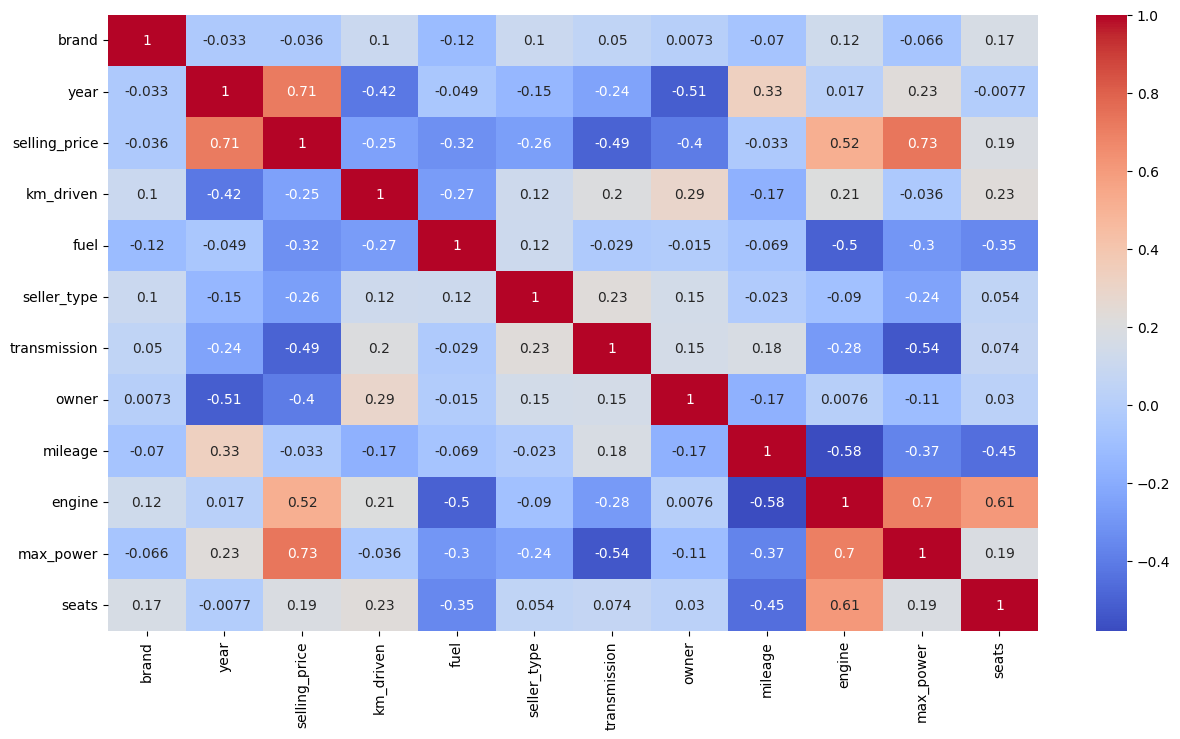

In [27]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

To see how well each 1 feature predict target feature 

<Axes: xlabel='x', ylabel='y'>

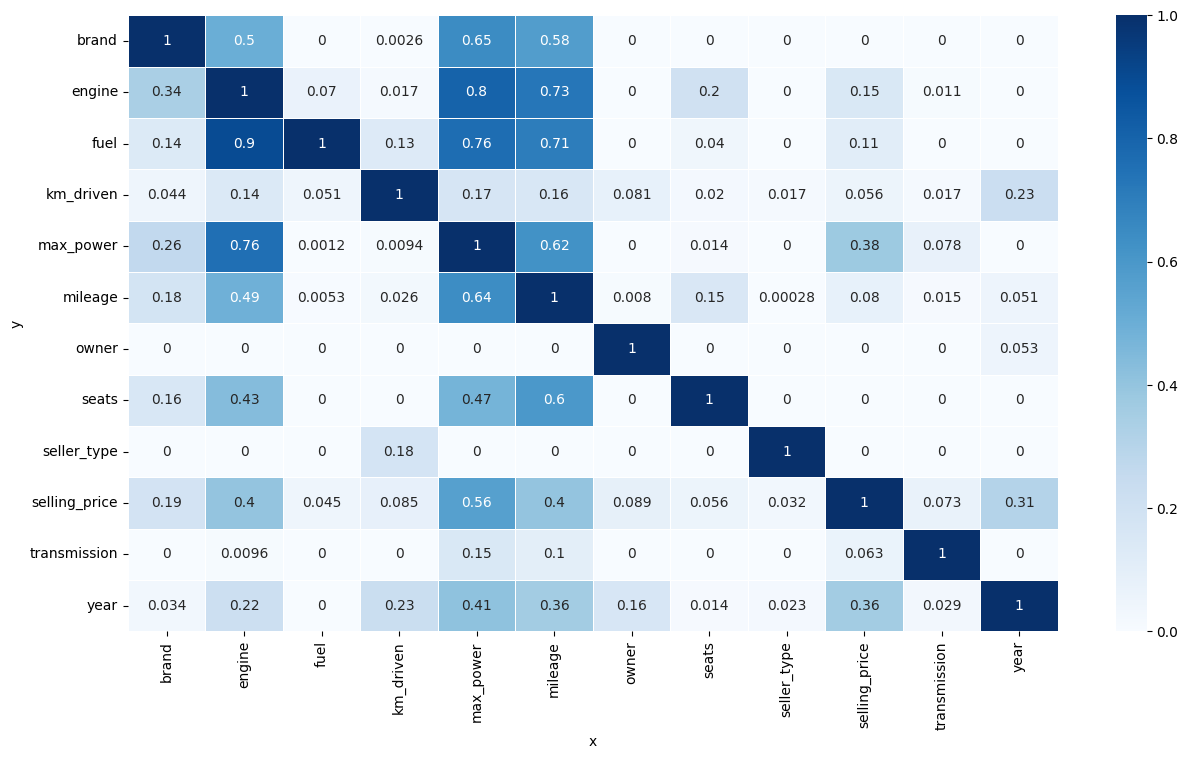

In [28]:
import ppscore as pps

# Copy dataframe
dfcopy = df.copy()

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#Plot PPS map
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature Engineering

We don't need to Dimensionality reduction, Feature splitting, and Creating features in this data 

## 4. Feature selection

From the correlation matrix and scatterplot of engine and max power, I can conclude that engine and mileage have a high correlation, and I pick one of those, which is max power as a feature.

From the PPS map, I can analyze which feature is well predict the selling price well, and I can order from good to bad score to predict the selling price:\
1.max_power\
2.engine (I am not select it as feature)\
3.mileage\
4.year\
5.brand\
6.owner\
7.km_driven\
8.transmission\
9.seats\
10.fuel\
11.seller_type

In [29]:
# Select the strong features
#X = df[        ['max_power']        ]
#X = df[        ['max_power', 'mileage']        ]
#X = df[        ['max_power', 'mileage','year']        ]
#X = df[        ['max_power', 'mileage','year', 'brand']        ]
X = df[        ['max_power', 'mileage',  'year','brand','owner']        ] 
#X = df[        ['brand', 'max_power', 'mileage',  'year','owner', 'km_driven']        ] 



# Assign selling price as label
y = df["selling_price"]

In [30]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 5. Preprocessing

### Checking null values

In [31]:
# Check null in X_train
X_train.isna().sum()

max_power    165
mileage      171
year           0
brand          0
owner          0
dtype: int64

In [32]:
# Check null in X_test
X_test.isna().sum()

max_power    43
mileage      43
year          0
brand         0
owner         0
dtype: int64

In [33]:
# Check null in y_train
y_train.isna().sum()

0

In [34]:
# Check null in y_test
y_test.isna().sum()

0

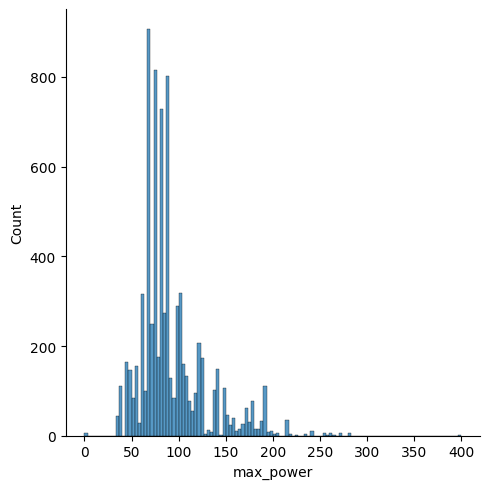

In [35]:
#Plot Distribution plot of max power
sns.displot(data=df, x='max_power')

In [36]:
# Find mean of max power
X_train['max_power'].mean()

91.78763944382293

In [37]:
# Find median of max power
X_train['max_power'].median()

82.85

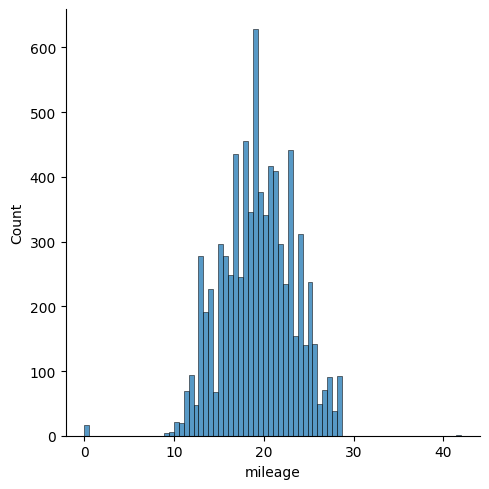

In [38]:
#Plot Distribution plot of mileage
sns.displot(data=df, x='mileage')

In [39]:
# Find mean of mileage
X_train['mileage'].mean()

19.383089105743082

In [40]:
# Find median of mileage
X_train['mileage'].median()

19.3

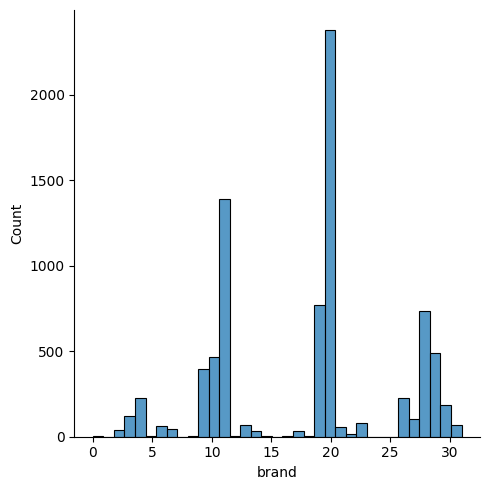

In [41]:
#Plot Distribution plot of brand
sns.displot(data=df, x='brand')

In [42]:
# Find mode of brand
X_train['brand'].mode()

0    20
Name: brand, dtype: int64

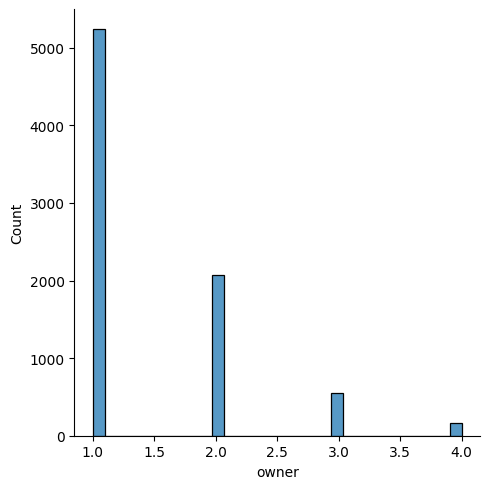

In [43]:
#Plot Distribution plot of owner
sns.displot(data=df, x='owner')

In [44]:
# Find mode of owner
X_train['owner'].mode()

0    1
Name: owner, dtype: int64

In [45]:
# fill the mean and median to null value in the training set
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [46]:
# fill the mean and median to null value in the test set
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [47]:
#check null in X_train again
X_train.isna().sum()

max_power    0
mileage      0
year         0
brand        0
owner        0
dtype: int64

In [48]:
#check null in X_test again
X_test.isna().sum()

max_power    0
mileage      0
year         0
brand        0
owner        0
dtype: int64

### Checking Outliers

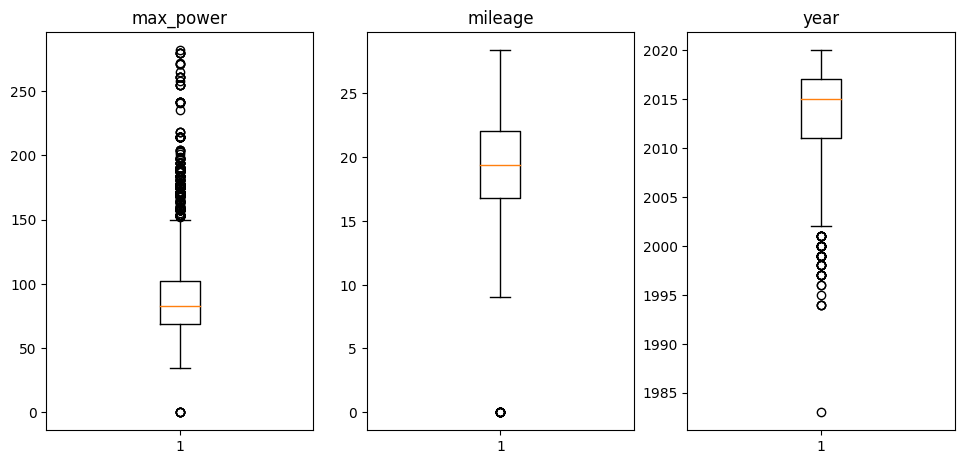

In [49]:
# Check outlier in numeric column (not category column)
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2,'year':3}


# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,5,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [50]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [51]:
for col in X_train[['max_power','mileage', 'year']].columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%


In [52]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 5)
Shape of X_test:  (1606, 5)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 6. Modeling

In [53]:
# Import the models that I use
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Make a list of model algorithm
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [54]:
from sklearn.model_selection import KFold, cross_val_score

# Lists for keeping mse
train_mse = []
test_mse = []

# Define the number of fold to split the dataset
kfold = KFold(n_splits=10, shuffle=True)

# Train the model and calculate the negative mean squared error
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.13831417 -0.11340194 -0.11789074 -0.11691814 -0.11248886 -0.11620133
 -0.10999502 -0.12011924 -0.10921867 -0.11618806]; Mean: -0.11707361600147129
SVR - Score: [-0.32484796 -0.31847649 -0.290291   -0.34234706 -0.35406828 -0.32995342
 -0.34399055 -0.29434522 -0.32284018 -0.33379189]; Mean: -0.32549520525296977
KNeighbors Regressor - Score: [-0.05738679 -0.05748217 -0.05726411 -0.06691958 -0.05569925 -0.05092528
 -0.05853813 -0.06972236 -0.05996171 -0.05534044]; Mean: -0.058923981365881783
Decision-Tree Regressor - Score: [-0.0837766  -0.07102063 -0.05936445 -0.06751073 -0.0522343  -0.06792245
 -0.06867935 -0.07956167 -0.09032934 -0.07875089]; Mean: -0.0719150408760565
Random-Forest Regressor - Score: [-0.04887736 -0.04187318 -0.04923613 -0.04921977 -0.04643691 -0.05594602
 -0.05436495 -0.05859137 -0.05357823 -0.05178839]; Mean: -0.050991230286084585


### Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10],
              'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search to loop all the possible parameters
grid.fit(X_train, y_train);

In [56]:
# Print parameter of best model
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}

In [57]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [58]:
# Print mean squared error of the model
best_mse

-0.052496288335830345

I tried many models including:\
Model 1 : has max_power as feature and get -0.16525 on mse in grid search (random forest) \
Model 2 : has max_power and mileage as features and get -0.10865 on mse in grid search (random forest)\
Model 3 : has max_power, mileage and year as features and get -0.05614 on mse in grid search (random forest)\
Model 4 : has max_power, mileage, year, and brand as features and get -0.05316 on mse in grid search (random forest)\
Model 5 : has max_power, mileage, year, brand, and owner as features and get -0.0525 on mse in grid search (random forest)\
Model 6 : has max_power, mileage, year, brand, owner, and km_driven as features and get -0.05406 on mse in grid search (random forest)\
\
From Model 6, The model is not improve when I add the km_driven as feature of model, so I stop at this model and I conclude that Model 5 is the best model for predicting car price

## 7. Testing

Test the model with test set (X_test)

In [59]:
from sklearn.metrics import mean_squared_error

yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.047060058319940985

## 8. Analysis:  Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

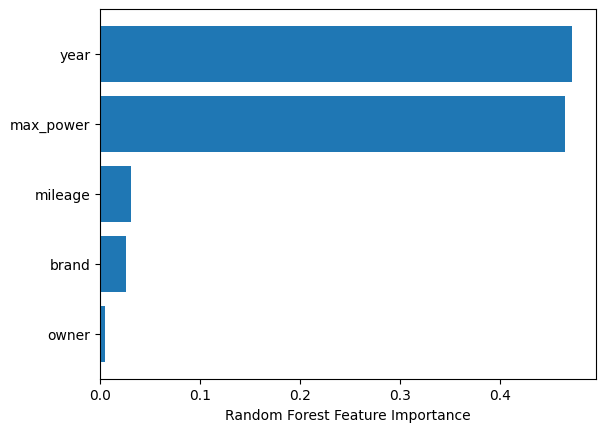

In [60]:
# Find the feature importance by Algorithm way
rf = grid.best_estimator_

# Sort the feature 
sorted_idx = rf.feature_importances_.argsort()

# Plot bar graph
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 9. Inference

In [61]:
import pickle

# save the model to disk
filename = 'selling_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [62]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [63]:
# Try to create the example from the dataset
df[['brand','max_power', 'mileage', 'year','owner']].loc[0]

brand          20.0
max_power      74.0
mileage        23.4
year         2014.0
owner           1.0
Name: 0, dtype: float64

In [64]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[0])

450000.00000000035

In [65]:
# Create array of sample data
#['max_power', 'mileage',  'year','brand','owner']
sample = np.array([[74, 23.4,2014,20,1]])  

# Predict the selling price
predicted_price = loaded_model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([469447.53956602])

I chose 5 features to train the Predicting Car Price model, which are brand, max power, mileage, year, and owner. From part 8. Analysis:  Feature Importance, I can analyze that the feature importances are year and max power because these 2 features got high scores. For the year feature, we can see from the scatterplot between year and selling price. The higher the year (high year means new car), The higher the selling price. For max power feature, we can also see from the scatterplot between max power and selling price. The higher the max power (high max power such as a supercar), The higher the selling price.

The rest of the 3 features are not important compared score with year and max power features that you can see the score in part 8. For mileage, we can see from the scatterplot between mileage and selling price that it does not have a trend to each other. For brand feature, in the real world, there are cases in supercars that have been used for many years which is lower selling price than a normal car that was bought last year. For the owner feature, There is the case that a third owner with a total of 5 years of use is a higher selling price than the first owner with 10 years of use.

The random forest algorithm performs well in this data because it is made from integrated many decision tree models. Each decision tree model takes different sub-data by random after that the model calculates the mean of all decision trees. this is why a random forest works better than a decision tree. For linear regression, the features and label do not have a linear relationship, so the linear regression model works worse. SVR is the model to find linear or non-linear with boundary lines to fit the data and calculate mse of the data that is outside the boundary. the model work badly because some feature do not have a relationship with the selling price. KNeighbors Regressor calculates the distance between real data and predicted data. the model works badly because some feature does not have a relationship with the selling price and make high distance and mse.